# Analiza filmske industrije i povezanost s osvojenim Oscarima

## Uvod

Filmska industrija jedno je od najutjecajnijih područja zabave, a dodjela Oscara predstavlja najprestižniju nagradu u toj industriji. Cilj ovog projekta je istražiti povezanost karakteristika filmova, poput ocjena korisnika i financijskih performansi, s njihovim uspjesima na dodjeli Oscara. Kroz analizu dvaju skupova podataka, može se dobiti dublji uvid u to što pridonosi uspjehu filma i kako su se trendovi mijenjali tijekom godina. Ova analiza može poslužiti kao vrijedan alat za razumijevanje filmske industrije i donošenje poslovnih odluka.
<br>
Analiza povezanosti između karakteristika filmova i njihovih osvojenih Oscara može pružiti korisne uvide za filmske profesionalce, istraživače i ljubitelje filma. Osim toga, tema omogućava primjenu različitih metoda analize podataka.

#### Način prikupljanja podataka

Za projekt su korišteni sljedeći skupovi podataka:
<br>
<b>1. Movie Industry Dataset - </b> Skup podataka u .csv formatu preuzet s Kaggle platforme, koji sadrži informacije o filmovima poput budžeta, zarade, ocjena korisnika, glasova, žanrova, režisera i drugih atributa. (https://www.kaggle.com/datasets/danielgrijalvas/movies/data)
<br>
<b>2. Oscar Academy Award-winning Films Dataset (1927–2022) -</b> Skup podataka pretvoren u .json format s informacijama o filmovima koji su osvojili Oscare, uključujući broj osvojenih nagrada i nominacija. (https://www.kaggle.com/datasets/pushpakhinglaspure/oscar-dataset)

## Opis implementacije

Kako bi smo započeli s radom, prvo je potrebno učitati prvi DataSet. Za učitavanje DataSeta koristit ćemo pandas biblioteku te ćemo DataSet spremiti u varijablu movies.

In [1]:
import pandas as pd
movies = pd.read_csv("movies.csv")
movies

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


Prije nego što krenemo sa analizom podataka, prvo je potrebno provjeriti i očistiti podatke ako je potrebno. To podrazumjeva brisanje duplikata, brisanje redaka u kojim fale ključni podaci, i sl. Istražit ćemo strukturu DataSeta te ćemo osigurati da su svi stupci u odgovarajućem formatu.

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
print("Broj dupliciranih redova: ", movies.duplicated().sum())

Broj dupliciranih redova:  0


In [10]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Možemo primjetiti da nedojstaju 2171 vrijednosti za budget i 189 vrijednosti za gross. Ti podaci će nam biti ključni pa ćemo ih kasnije filtrirati.
<br>
Sada ćemo provjeriti koliko redova nema budget, gross i koliko redova nema ni jedno ni drugo.

In [13]:
missing_budget = movies[(movies['budget'].isnull()) & (movies['gross'].notnull())].shape[0]
missing_gross = movies[(movies['gross'].isnull()) & (movies['budget'].notnull())].shape[0]
missing_gross_and_budget = movies[(movies['gross'].isnull()) & (movies['budget'].isnull())].shape[0]
print("Broj filmova koji imaju 'gross', ali nemaju 'budget':", missing_budget)
print("Broj filmova koji imaju 'budget', ali nemaju 'gross':", missing_gross)
print("Broj filmova koji nemaju 'budget', i nemaju 'gross':", missing_gross_and_budget)
print("Broj filmova koji nemaju budget, gross ili ni jedno ni drugo:", missing_budget + missing_gross + missing_gross_and_budget)

Broj filmova koji imaju 'gross', ali nemaju 'budget': 2043
Broj filmova koji imaju 'budget', ali nemaju 'gross': 61
Broj filmova koji nemaju 'budget', i nemaju 'gross': 128
Broj filmova koji nemaju budget, gross ili ni jedno ni drugo: 2232


### Analiza prvog DataSeta

<b>Analiza najčešćih žanrova</b>

In [3]:
genre = movies.genre.value_counts()
genre

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: count, dtype: int64

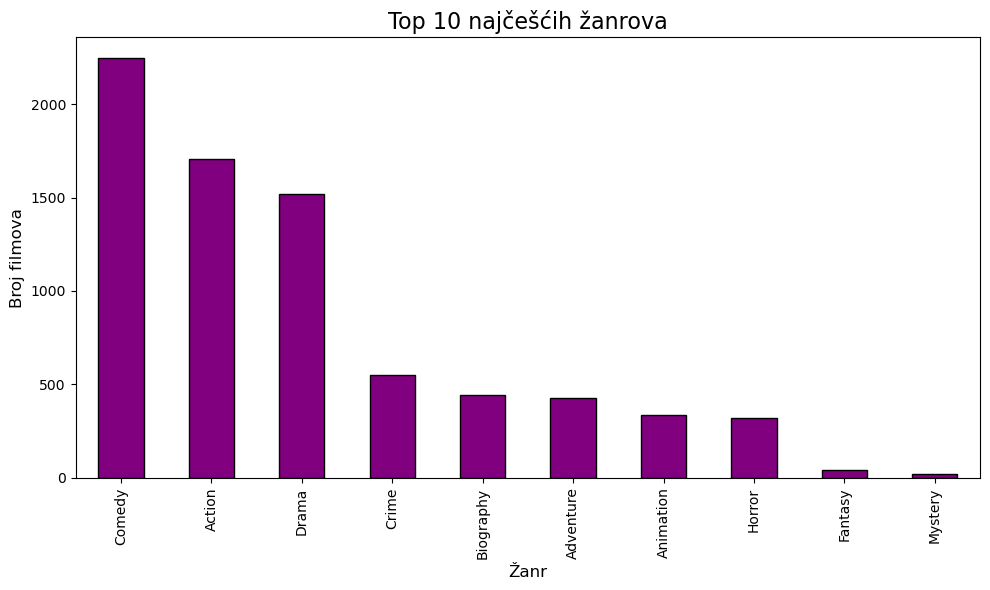

In [7]:
import matplotlib.pyplot as plt

top_genres = movies['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 najčešćih žanrova', fontsize=16)
plt.xlabel('Žanr', fontsize=12)
plt.ylabel('Broj filmova', fontsize=12)
plt.tight_layout()
plt.show()

Graf prikazuje top 10 najčešćih filmskih žanrova i broj filmova koji pripadaju svakom žanru. Možemo primjetiti da je 'Comedy' najčešći žanr sa 2245 filmova dok 'Mystery' žanr ima svega 20 filmova.

<b>Prosječno trajanje filmova</b>

In [9]:
avg_runtime = round(movies.runtime.mean())
print("Prosječno trajanje filma: ", avg_runtime, "minuta")

Prosječno trajanje filma:  107 minuta


Možemo vidjeti da je prosječno trajanje filmova 107 minuta. Sada ćemo prikazati prosječno trajanje filma po žanru.

In [11]:
avg_runtime_by_genre = movies.groupby('genre')['runtime'].mean()
avg_runtime_by_genre.sort_values(ascending=False)

genre
Musical      145.000000
Biography    119.880361
Music        117.000000
Mystery      115.750000
Drama        112.974934
Crime        111.752727
Action       110.211268
Adventure    107.978923
Romance      106.600000
Comedy       101.491759
Sci-Fi       100.300000
Family        99.909091
Fantasy       99.363636
Thriller      98.625000
Western       97.333333
Horror        96.304348
Sport         94.000000
Animation     92.204142
History       55.000000
Name: runtime, dtype: float64

Možemo primjetiti da je 'Musical' žanr s najduljim prosječnim trajanjem od 145 minuta dok 'History' žanr u prosjeku traje 55 minuta. Ovo nas može zavarati jer 'History' žanr ima samo jedan film a 'Musical' dva, zato ćemo promatrati samo one žanrove koji imaju više od 20 filmova.

In [13]:
genre_counts = movies.groupby('genre')['name'].count()
valid_genres = genre_counts[genre_counts > 20].index
filtered_movies = movies[movies['genre'].isin(valid_genres)]
avg_runtime_by_genre = filtered_movies.groupby('genre')['runtime'].mean()

sorted_avg_runtime_by_genre = avg_runtime_by_genre.sort_values(ascending=False)
sorted_avg_runtime_by_genre

genre
Biography    119.880361
Drama        112.974934
Crime        111.752727
Action       110.211268
Adventure    107.978923
Comedy       101.491759
Fantasy       99.363636
Horror        96.304348
Animation     92.204142
Name: runtime, dtype: float64

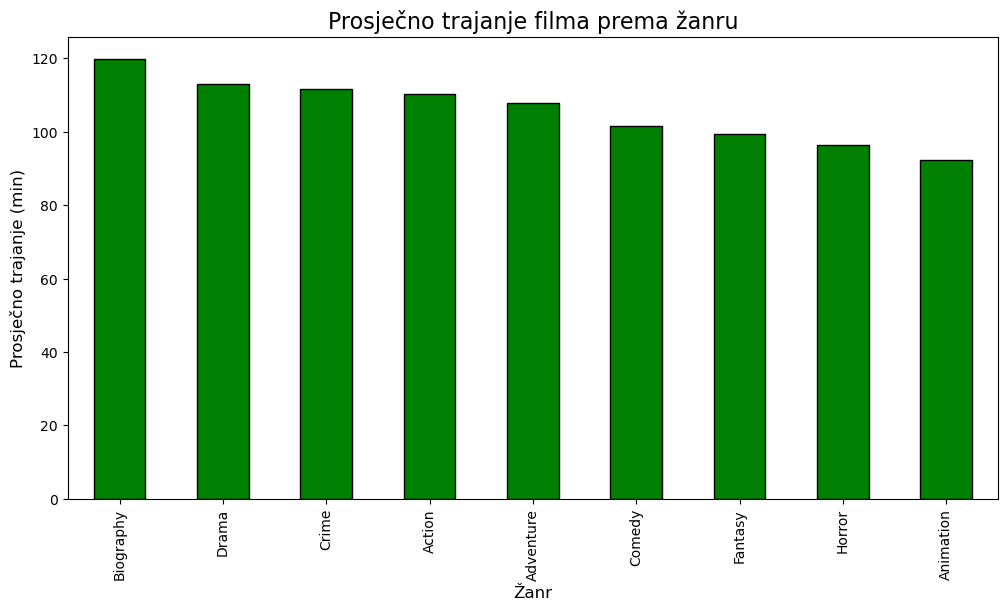

In [15]:
plt.figure(figsize=(12, 6))
sorted_avg_runtime_by_genre.plot(kind='bar', color='green', edgecolor='black')
plt.title('Prosječno trajanje filma prema žanru', fontsize=16)
plt.xlabel('Žanr', fontsize=12)
plt.ylabel('Prosječno trajanje (min)', fontsize=12)
plt.show()

Sada na grafu možemo vidjeti da žanr koji ima najdulje prosječno trajanje je 'Biography' sa 119 minuta dok je 'Animation' žanr s najkraćim prosječnim trajanjem od 92 minuta.

<b>Distribucija ocjena</b>

In [17]:
avg_score = round(movies['score'].mean(), 2)
print("Prosječna ocjena filmova:", avg_score)

Prosječna ocjena filmova: 6.39


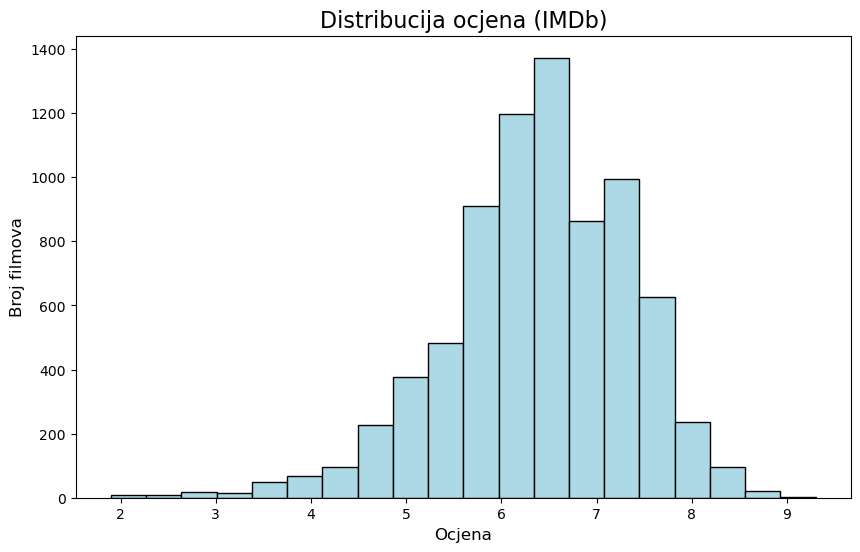

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(movies['score'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribucija ocjena (IMDb)', fontsize=16)
plt.xlabel('Ocjena', fontsize=12)
plt.ylabel('Broj filmova', fontsize=12)
plt.show()

Distribucija ocjena pokazuje da većina filmova ima ocjene koje su blizu prosječne vrijednosti (oko 6–7), dok je broj ekstremno loših ili izuzetno dobrih ocjena znatno manji.

<b>Povezanost ocjena i žanra</b>

Kako bi smo prikazali povezanost ocjena i žanra, prvo treba obrisati NaN vrijednosti za score te ćemo promatrati samo one žanrove koji imaju min 20 filmova.

In [27]:
filtered_score = movies.dropna(subset=["score"])

In [29]:
count_genre = filtered_score["genre"].value_counts()
min_genre = count_genre[count_genre > 20]
filtered_genres = filtered_score[filtered_score['genre'].isin(min_genre.index)]
min_genre

genre
Comedy       2245
Action       1704
Drama        1516
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Name: count, dtype: int64

In [31]:
avg_score_by_genre = filtered_genres.groupby("genre")["score"].mean().round(2).sort_values(ascending=False)
print("Prosječna ocjena po žanrovima:", avg_score_by_genre)

Prosječna ocjena po žanrovima: genre
Biography    7.03
Animation    6.77
Drama        6.69
Crime        6.67
Adventure    6.29
Action       6.20
Comedy       6.19
Fantasy      6.01
Horror       5.75
Name: score, dtype: float64


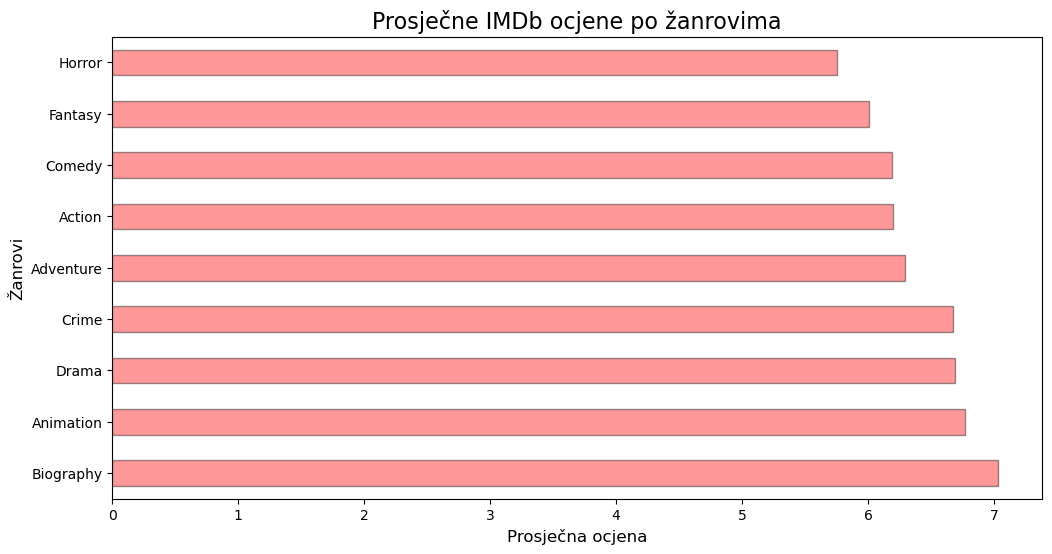

In [33]:
plt.figure(figsize=(12, 6))
avg_score_by_genre.plot(kind="barh", color="red", edgecolor="black", alpha=0.4)
plt.title("Prosječne IMDb ocjene po žanrovima", fontsize=16)
plt.xlabel("Prosječna ocjena", fontsize=12)
plt.ylabel("Žanrovi", fontsize=12)
plt.show()

Iz grafa možemo vidjeti da najvišu prosječnu ocjenu ima žanr Biography sa ocjenom 7.03, dok Horror ima najnižu prosječnu ocjenu 5.75

<b>Povezanost broja glasova i ocjena</b>

Ovdje ćemo prikazati top 20 filmova prema najviše glasova povezano s najboljim ocjenama.

In [35]:
top_voted_movies = filtered_score.sort_values(by=["votes", "score"], ascending=False)
top_20_voted_movies = top_voted_movies[["name", "score", "votes"]].head(20)
top_20_voted_movies

,name,score,votes
2443,The Shawshank Redemption,9.3,2400000.0
5243,The Dark Knight,9.0,2400000.0
5643,Inception,8.8,2100000.0
2444,Pulp Fiction,8.9,1900000.0
2445,Forrest Gump,8.8,1900000.0
3444,Fight Club,8.8,1900000.0
4245,The Lord of the Rings: The Return of the King,8.9,1700000.0
3845,The Lord of the Rings: The Fellowship of the Ring,8.8,1700000.0
3443,The Matrix,8.7,1700000.0
6444,Interstellar,8.6,1600000.0


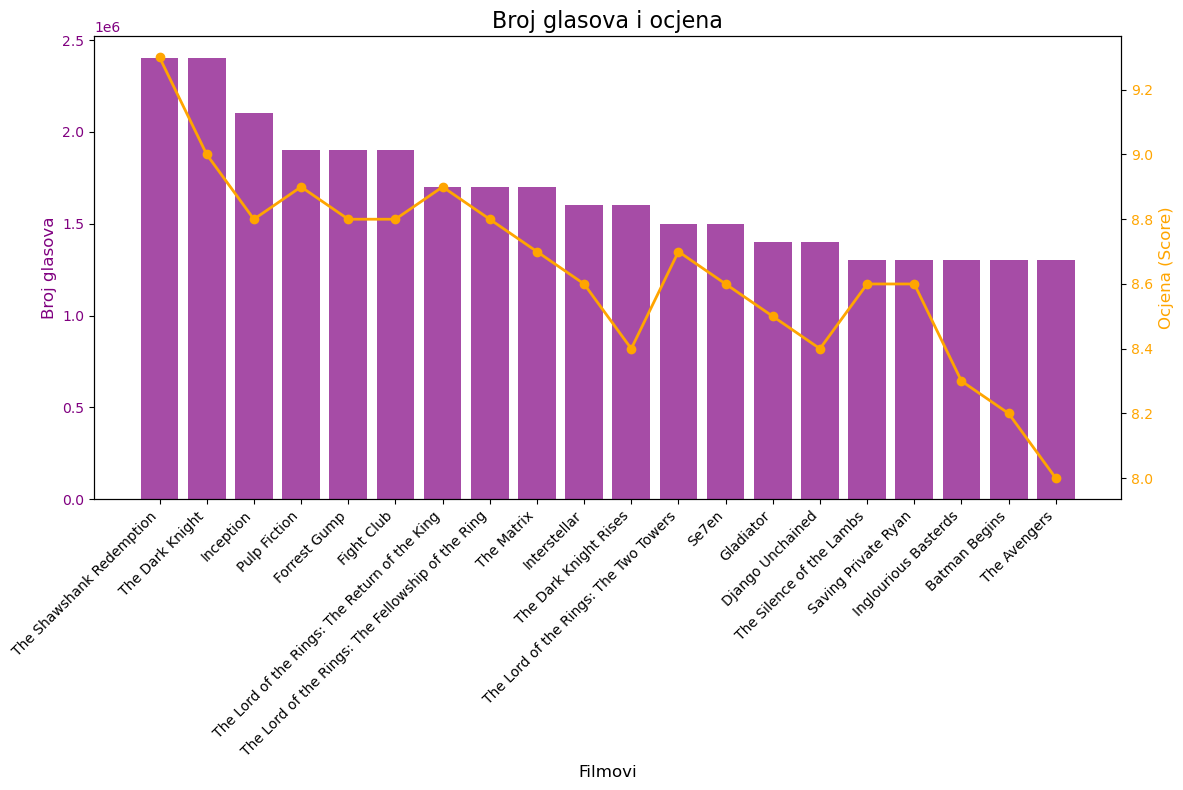

In [37]:
import numpy as np

films = top_20_voted_movies['name']
votes = top_20_voted_movies['votes']
scores = top_20_voted_movies['score']

x = np.arange(len(films))

fig, ax1 = plt.subplots(figsize=(12, 8))

# Prva y-os
ax1.bar(x, votes, color='purple', label='Broj glasova', alpha=0.7)
ax1.set_xlabel('Filmovi', fontsize=12)
ax1.set_ylabel('Broj glasova', fontsize=12, color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.set_xticks(x)
ax1.set_xticklabels(films, rotation=45, ha='right', fontsize=10)

# Druga y-os
ax2 = ax1.twinx()
ax2.plot(x, scores, color='orange', marker='o', label='Ocjena (Score)', linewidth=2)
ax2.set_ylabel('Ocjena (Score)', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Broj glasova i ocjena', fontsize=16)
fig.tight_layout()

plt.show()

Dijagram prikazuje povezanost broja glasova i ocjena za top 20 filmova s najviše glasova. Možemo vidjeti da filmovi s većim brojem glasova često imaju bolje ocjene, ali to nije pravilo. Filmovi kao što su The Shawshank Redemption i The Dark Knight, imaju najviše glasova i također imaju visoke ocjene pa možemo zaključiti da popularnost filma često prati i kvalitetu.

<b>Trend ocjena, prihoda i budžeta kroz godine</b>

Sada ćemo analizirat kako se prosječne IMDb ocjene, prosječni prihodi i budžet filmova mijenjaju tijekom godina. Prije nego što krenemo, potrebno je filtrirati, odnosno maknuti redke s NaN vrijednostima za stupce 'budget' i 'gross'.

In [39]:
movies_cleaned = movies.dropna(subset=["budget", "gross"])

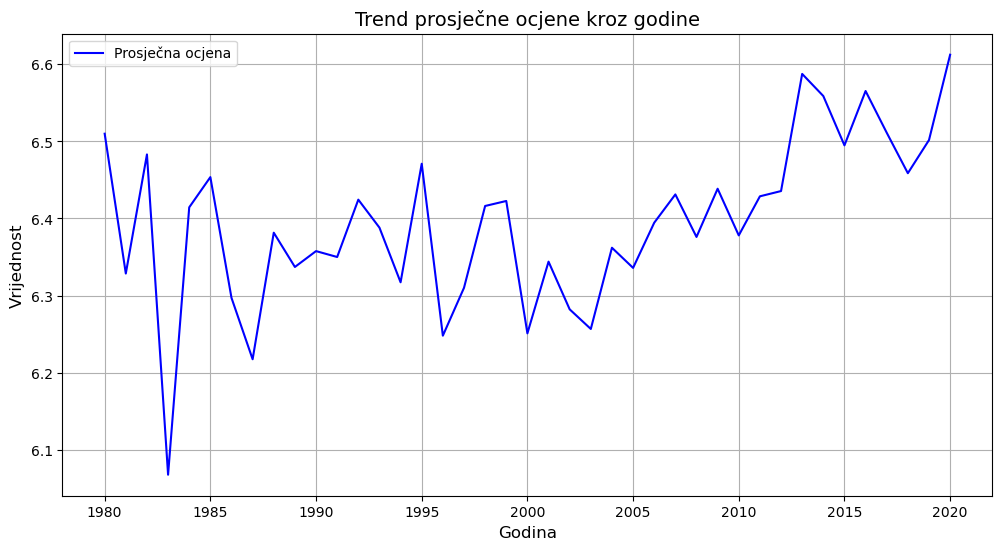

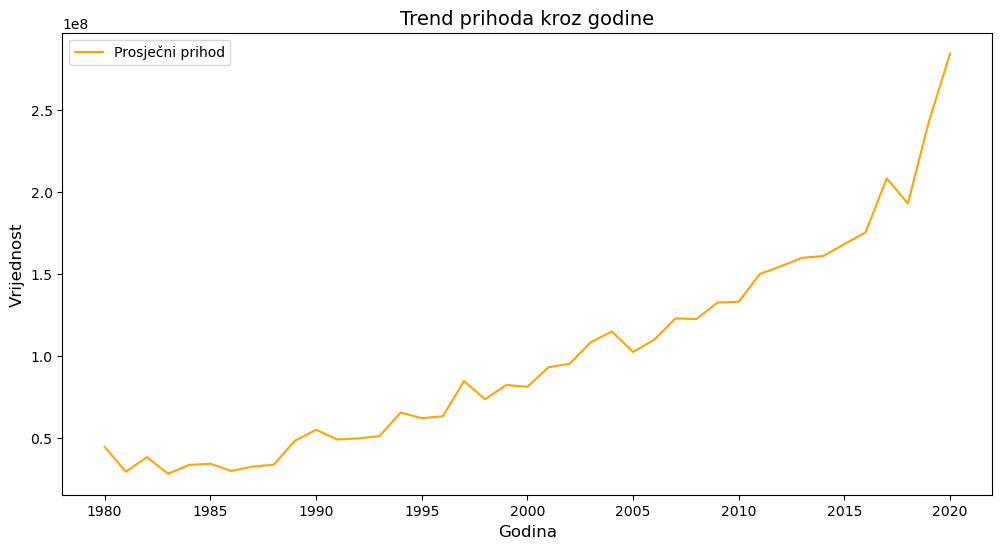

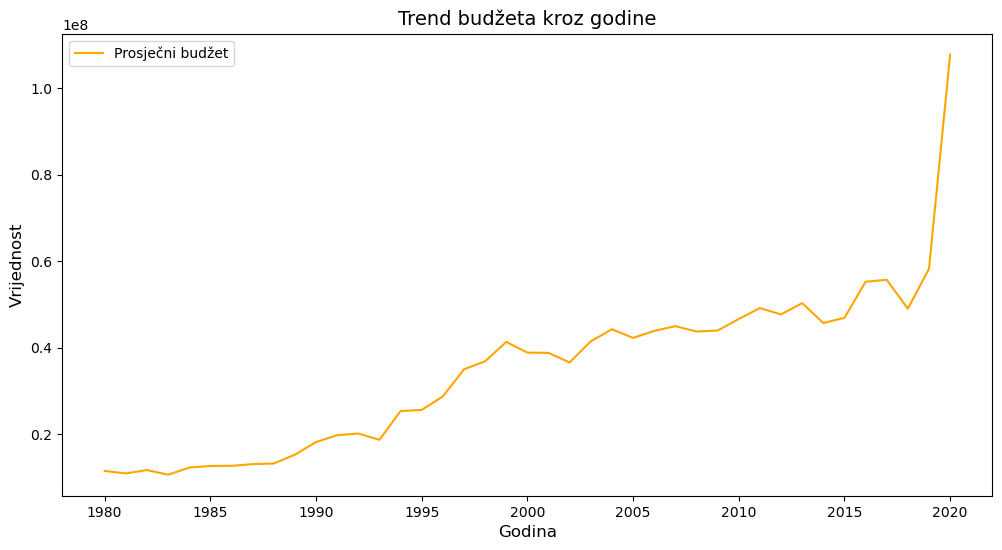

In [41]:
pd.options.display.float_format = "{:,.2f}".format
avg_score_by_year = movies_cleaned.groupby("year")["score"].mean()
avg_gross_by_year = movies_cleaned.groupby("year")["gross"].mean()
avg_budget_by_year = movies_cleaned.groupby("year")["budget"].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_score_by_year, label="Prosječna ocjena", color="blue")
plt.title("Trend prosječne ocjene kroz godine", fontsize=14)
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Vrijednost", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(avg_gross_by_year, label="Prosječni prihod", color="orange")
plt.title("Trend prihoda kroz godine", fontsize=14)
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Vrijednost", fontsize=12)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(avg_budget_by_year, label="Prosječni budžet", color="orange")
plt.title("Trend budžeta kroz godine", fontsize=14)
plt.xlabel("Godina", fontsize=12)
plt.ylabel("Vrijednost", fontsize=12)
plt.legend()
plt.show()

Iz prvog grafa možemo vidjeti da su prosječne ocjene od 1980. do 2000. relativno stabilne te se nakon 2000. blago povećavaju. Ovaj rast može ukazivati na poboljšanje kvalitete filmova. 
<br>
Prosječni prihodi filmova značajno raste kroz godine te dostiže vrhunac oko 2020.
<br>
Prosječni budžet filmova također prikazuje rast kroz godine s naglim porastom u 2020.
<br>
Možemo zaključiti da grafovi prikazuju povezanost između rasta budžeta i prihoda, dok su ocjene i dalje dosta stabilne što može sugerirati da visoki budžet i prihod možda ne jamče bolje ocjene.

<b>Analiza budžeta i prihoda</b>

Sada ćemo istražiti povezanost između budžeta filmova i njihovih ostvarenih prihoda. Cilj je razumjeti kako ulaganje u proizvodnju filma utječe na njegov financijski uspjeh.

In [43]:
from humanize import intword

avg_budget = movies["budget"].mean()
avg_gross = movies["gross"].mean()
print("Prosječni budžet:", intword(avg_budget))
print("Prosječni prihod:", intword(avg_gross))

Prosječni budžet: 35.6 million
Prosječni prihod: 78.5 million


Ova analiza bi nas mogla zavarati s obzirom da postoji 2100+ redaka di fali budget ili gross pa ćemo ih filtrirati

In [47]:
avg_budget = movies_cleaned["budget"].mean()
avg_gross = movies_cleaned["gross"].mean()
print("Prosječni budžet:", intword(avg_budget))
print("Prosječni prihod:", intword(avg_gross))

Prosječni budžet: 35.9 million
Prosječni prihod: 103.0 million


Provjerit ćemo korelaciju budžeta i prihoda na žanru Animation

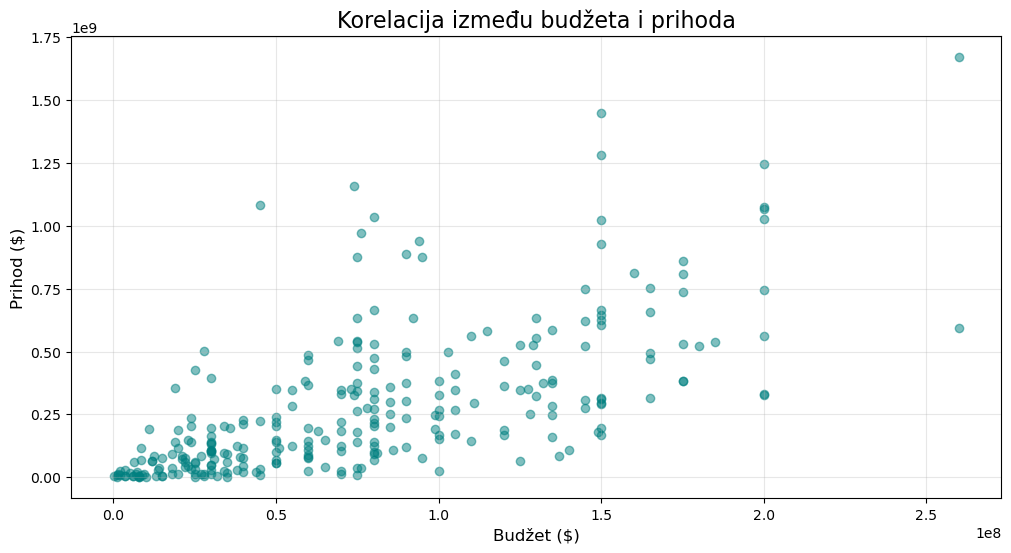

In [49]:
filtered_movies_by_action = movies_cleaned[movies_cleaned.genre == "Animation"]
plt.figure(figsize=(12, 6))
plt.scatter(filtered_movies_by_action["budget"], filtered_movies_by_action["gross"], alpha=0.5, color="teal")
plt.title("Korelacija između budžeta i prihoda", fontsize=16)
plt.xlabel("Budžet ($)", fontsize=12)
plt.ylabel("Prihod ($)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Na ovom dijagramu prikazana je korelacija između budžeta i prihoda za filmove iz žanra "Animation". Vidljivo je da veći budžet generalno vodi do većih prihoda, što sugerira da ulaganje u film ima pozitivan utjecaj na uspjeh filmova. Možemo vidjeti da filmovi s malim budžetom prikazuju nizak i ograničen prihod, dok filmovi s većim budžetom ostvaruju veće zarade.

## Drugi DataSet

Sada ćemo učitati drugi DataSet koji sadrži informacije o filmovima koji su osvojili Oscare, uključujući broj osvojenih nagrada i nominacija.
<br>
Prije nego što krenemo sa radom, provjerit ćemo DataSet.

In [51]:
import json

with open('oscar.json', 'r') as file:
    data = json.load(file)

oscar = pd.DataFrame(data)

oscar

,FIELD1,Film,Year,Award,Nomination
0,0,Everything Everywhere All at Once,2022,7,11
1,1,All Quiet on the Western Front,2022,4,9
2,2,The Whale,2022,2,3
3,3,Top Gun: Maverick,2022,1,6
4,4,Black Panther: Wakanda Forever,2022,1,5
...,...,...,...,...,...
1355,1355,The Yankee Doodle Mouse,1943,1,1
1356,1356,The Yearling,1946,2,7
1357,1357,"Yesterday, Today and Tomorrow",1964,1,1
1358,1358,You Can't Take It with You,1938,2,7


In [53]:
oscar.drop("FIELD1", axis=1, inplace=True)

In [105]:
oscar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1360 entries, 0 to 1359
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Film        1360 non-null   object
 1   Year        1360 non-null   int64 
 2   Award       1360 non-null   int64 
 3   Nomination  1360 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 42.6+ KB


In [55]:
duplicates = oscar.duplicated().sum()
print("Broj dupliciranih redaka:", duplicates)

Broj dupliciranih redaka: 0


In [109]:
oscar.Nomination.sort_values()

1072     0
864      0
1173     0
1117     0
1029     0
        ..
1106    13
295     13
365     14
828     14
91      14
Name: Nomination, Length: 1360, dtype: int64

Obrisat ćemo filmove koji imaju 0 nominacija i 0 nagrada.

In [170]:
oscar[(oscar["Nomination"] == 0) & (oscar["Award"] == 0)]

,Film,Year,Award,Nomination
864,Bill and Coo,1948,0,0
907,The Circus,28,0,0
961,Fantasia,1940,0,0
974,,1961,0,0
1029,The House I Live In,1945,0,0
1072,Kukan,1941,0,0
1088,The Little Kidnappers,1954,0,0
1117,Monsieur Vincent,1948,0,0
1173,Pollyanna,1960,0,0
1202,Samurai I: Musashi Miyamoto,1955,0,0


In [57]:
oscar = oscar.drop(oscar[(oscar['Nomination'] == 0) & (oscar['Award'] == 0)].index)

In [47]:
oscar.Year.sort_values().unique()

array([  21,   28,   29,   30,   31,   32,   33, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2021, 2022], dtype=int64)

Možemo primjetiti da su neke godine čudne.

In [176]:
oscar[oscar.Year==31]

,Film,Year,Award,Nomination
906,Cimarron,31,3,7
928,The Dawn Patrol,31,1,1
975,A Free Soul,31,1,3
1113,Min and Bill,31,1,1
1225,Skippy,31,1,4
1267,Tabu,31,1,1


Primjećujemo da 21 predstavlja 2021. godinu, 28 predstavlja 1928. godinu, 29 predstavlja 1929. godinu i tako dalje. Te godine potrebno je ispraviti da se prikazuju u ispravnom formatu.

In [59]:
def correct_year(year):
    if year == 21:
        return 2020
    elif year < 100:
        return 1900 + year
    else:
        return year

oscar["Year"] = oscar["Year"].apply(correct_year)

oscar.Year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
1355    1943
1356    1946
1357    1964
1358    1938
1359    1964
Name: Year, Length: 1347, dtype: int64

In [181]:
oscar.Year.sort_values().unique()

array([1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

Sada su svi filmovi prikazani u ispravnim godinama.

<b>Prosječan broj nagrada i nominacija</b>

In [61]:
avg_award = oscar.Award.mean().round(2)
avg_nomination = oscar.Nomination.mean().round(2)
print("Prosječan broj osvojenih nagrada po filmu:", avg_award)
print("Prosječan broj nominacija po filmu:", avg_nomination)

Prosječan broj osvojenih nagrada po filmu: 1.59
Prosječan broj nominacija po filmu: 3.65


<b>top 10 filmova po osvojenim nagradama</b>

In [63]:
top_award_movies = oscar.sort_values(by="Award",ascending=False).head(10)
top_award_movies[["Film", "Award"]]

,Film,Award
855,Ben-Hur,11
283,The Lord of the Rings: The Return of the King,11
365,Titanic,11
1328,West Side Story,10
509,The Last Emperor,9
376,The English Patient,9
985,Gigi,9
994,Gone with the Wind,8
1154,On the Waterfront,8
977,From Here to Eternity,8


<b>Povezanost broja nominacija i osvojenih nagrada</b>

U ovom dijelu istražit ćemo povezanost između broja nominacija i broja osvojenih nagrada kako bismo utvrdili postoji li veza između ovih dvaju faktora.

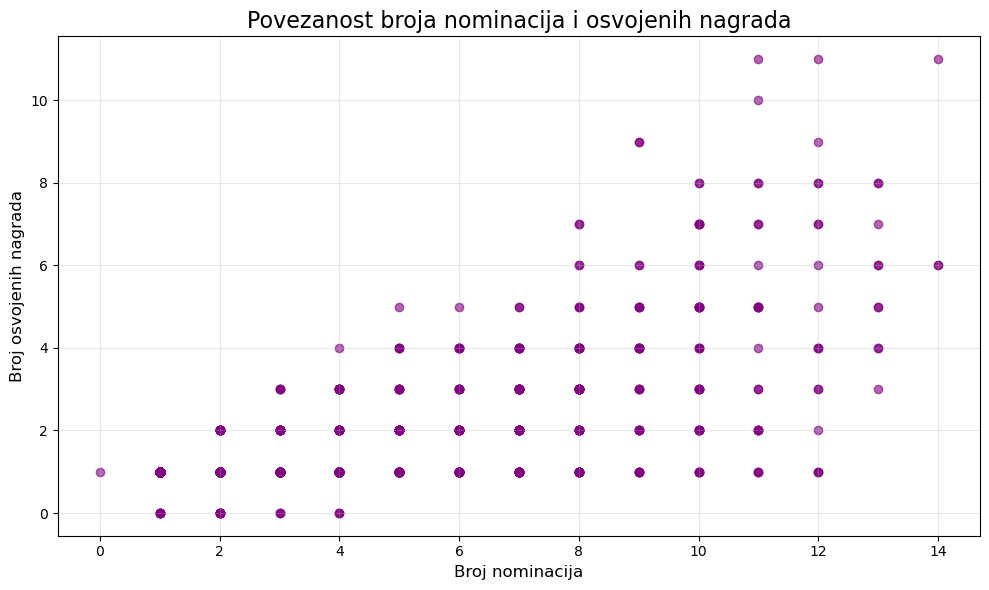

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(oscar["Nomination"], oscar["Award"], alpha=0.6, color="purple")

plt.title("Povezanost broja nominacija i osvojenih nagrada", fontsize=16)
plt.xlabel("Broj nominacija", fontsize=12)
plt.ylabel("Broj osvojenih nagrada", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

Iz dijagrama se može vidjeti da filmovi s većim brojem nominacija imaju i veći broj osvojenih nagrada što nam sugerira da veći broj nominacija povećava šansu za osvajanje nagrade. Također možemo vidjeti da filmovi s 1 do 4 nominacija, ostvaruju 0 ili mali broj nagrada.

## Usporedba prvog i drugog dataseta

Kako bi smo spojili ova dva DataSeta, prvo moramo prilagoditi podatke svakog DataSeta. S obzirom da movies DataSet ima filmove od 1980. do 2020. a oscar DataSet od 1928 do 2022, morat ćemo filtrirati DataSet.

In [67]:
movies_filtered = movies[(movies['year'] >= 1980) & (movies['year'] <= 2020)].copy()
oscar_filtered = oscar[(oscar['Year'] >= 1980) & (oscar['Year'] <= 2020)].copy()

In [69]:
movies_filtered['normalized_name'] = movies_filtered['name'].str.lower().str.strip()
oscar_filtered['normalized_name'] = oscar_filtered['Film'].str.lower().str.strip()

Ovaj dio koda služi za normalizaciju naziva filmova u oba dataseta kako bi se omogućilo točno uspoređivanje i spajanje podataka. Normalizacija uključuje pretvaranje svih slova u mala slova te brisanje razmaka na početku i kraju naziva.

In [71]:
merged_data = pd.merge(movies_filtered, oscar_filtered, left_on=['normalized_name', 'year'], right_on=['normalized_name', 'Year'], how='inner')
merged_data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,normalized_name,Film,Year,Award,Nomination
0,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.20,"330,000.00",Martin Scorsese,Jake LaMotta,Robert De Niro,United States,"18,000,000.00","23,402,427.00",Chartoff-Winkler Productions,129.00,raging bull,Raging Bull,1980,2,8
1,Ordinary People,R,Drama,1980,"September 19, 1980 (United States)",7.70,"49,000.00",Robert Redford,Judith Guest,Donald Sutherland,United States,"6,000,000.00","54,766,923.00",Paramount Pictures,124.00,ordinary people,Ordinary People,1980,4,6
2,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.60,"21,000.00",Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,"21,202,829.00",Metro-Goldwyn-Mayer (MGM),134.00,fame,Fame,1980,2,6
3,Coal Miner's Daughter,PG,Biography,1980,"March 7, 1980 (United States)",7.50,"17,000.00",Michael Apted,Thomas Rickman,Sissy Spacek,United States,NaN,"67,182,787.00",Universal Pictures,124.00,coal miner's daughter,Coal Miner's Daughter,1980,1,7
4,Melvin and Howard,R,Comedy,1980,"September 19, 1980 (United States)",6.80,"4,500.00",Jonathan Demme,Bo Goldman,Paul Le Mat,United States,"7,000,000.00","4,309,490.00",Universal Pictures,95.00,melvin and howard,Melvin and Howard,1980,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,Ford v Ferrari,PG-13,Action,2019,"November 15, 2019 (United States)",8.10,"323,000.00",James Mangold,Jez Butterworth,Matt Damon,United States,"97,600,000.00","225,508,210.00",Chernin Entertainment,152.00,ford v ferrari,Ford v Ferrari,2019,2,4
360,Marriage Story,R,Comedy,2019,"December 6, 2019 (United States)",7.90,"265,000.00",Noah Baumbach,Noah Baumbach,Adam Driver,United Kingdom,"18,600,000.00","333,686.00",Heyday Films,137.00,marriage story,Marriage Story,2019,1,6
361,Rocketman,R,Biography,2019,"May 31, 2019 (United States)",7.30,"153,000.00",Dexter Fletcher,Lee Hall,Taron Egerton,United Kingdom,"40,000,000.00","195,179,299.00",Paramount Pictures,121.00,rocketman,Rocketman,2019,1,1
362,Toy Story 4,G,Animation,2019,"June 21, 2019 (United States)",7.70,"217,000.00",Josh Cooley,John Lasseter,Tom Hanks,United States,"200,000,000.00","1,073,394,593.00",Pixar Animation Studios,100.00,toy story 4,Toy Story 4,2019,1,2


Sada smo spojili dva filtrirana DataFrame-a (movies_filtered i oscar_filtered) koristeći zajedničke stupce normalized_name i year. Spajanje se radi pomoću inner metode, što znači da će u rezultat biti uključeni samo oni filmovi koji postoje u oba DataFrame-a i imaju iste vrijednosti za ime i godinu. Na taj način osiguravamo da se podaci točno spoje bez miješanja različitih filmova kojki imaju isti naziv. 

<b>Usporedba ocjena s brojem nominacija i nagrada</b>

U ovom dijelu analizirat ćemo povezanost između IMDb ocjena i broja nominacija te osvojenih nagrada kako bismo utvrdili postoje li uzorci koji povezuju ocjene filmova s njihovim uspjehom na dodjelama nagrada.

In [73]:
merged_data_by_nomination = merged_data.groupby("score")["Nomination"].sum()
merged_data_by_nomination

score
5.60      1
5.80      1
5.90      1
6.00      2
6.10      9
6.20     11
6.30      9
6.40      7
6.50     10
6.60     20
6.70     16
6.80     36
6.90     16
7.00     25
7.10     40
7.20    113
7.30    135
7.40    171
7.50    127
7.60     87
7.70    152
7.80    148
7.90    102
8.00    152
8.10    104
8.20     71
8.30     70
8.40     20
8.50     45
8.60     29
8.70     16
8.80     34
8.90     30
9.00      8
Name: Nomination, dtype: int64

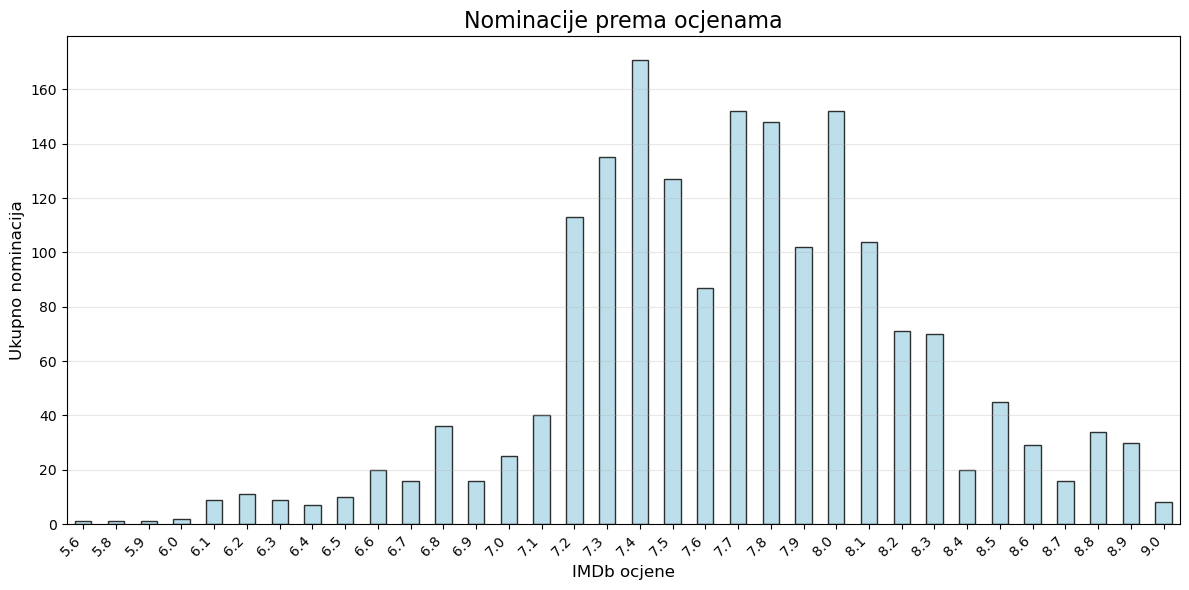

In [75]:
plt.figure(figsize=(12, 6))
merged_data_by_nomination.plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.8)
plt.title('Nominacije prema ocjenama', fontsize=16)
plt.xlabel('IMDb ocjene', fontsize=12)
plt.ylabel('Ukupno nominacija', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

Dijagram prikazuje povezanost IMDb ocjena i broja nominacija koje su filmovi dobili. Vidljivo je da su filmovi s ocjenama između 7.0 i 8.0 dobili najviše nominacija. Filmovi s ocjenama ispod 7.0 imaju znatno manji broj nominacija, dok filmovi s ocjenama većim od 8.5 također imaju manji broj nominacija. To nam može sugerirati da je veći broj nominacija povezan s filmovima koji imaju bolje ocjene ali ne ekstremno visoke ocjene.

Sada ćemo usporediti ocjene s brojem nagrada.

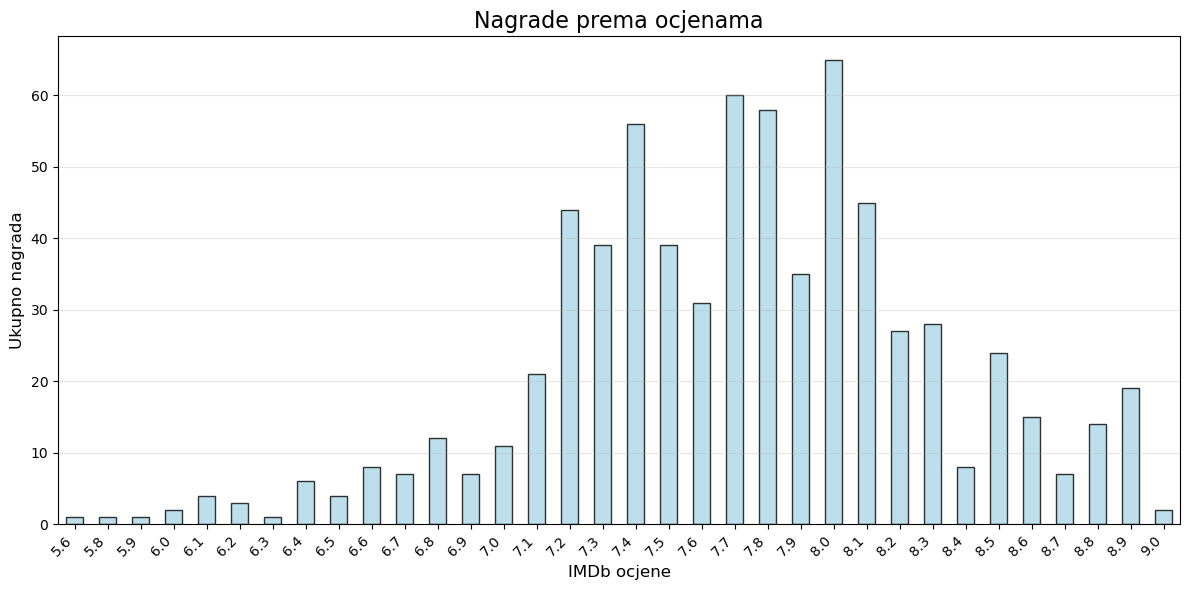

In [77]:
merged_data_by_award = merged_data.groupby("score")["Award"].sum()
merged_data_by_award

plt.figure(figsize=(12, 6))
merged_data_by_award.plot(kind='bar', color='lightblue', edgecolor='black', alpha=0.8)
plt.title('Nagrade prema ocjenama', fontsize=16)
plt.xlabel('IMDb ocjene', fontsize=12)
plt.ylabel('Ukupno nagrada', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()

plt.show()

Isto kao i na prethodnom dijagramu, vidljivo je da su filmovi sa ocjenama između 7 i 8 dobili najviše nagrada.

<b>Usporedba budžeta s brojem nominacija i nagrada</b>

U ovom djelu analizirat ćemo kako veličina budžeta filma utječe na broj osvojenih nominacija i nagrada. Cilj je istražiti postoji li povezanost između većeg budžeta i većeg uspjeha na filmskim nagradama.

In [79]:
merged_data_cleaned = merged_data.dropna(subset=["budget"])
merged_budget_by_nomination = merged_data_cleaned.groupby("budget")["Nomination"].sum()
merged_budget_by_nomination

budget
150,000.00        1
500,000.00        2
900,000.00        1
1,000,000.00      2
2,000,000.00      4
                 ..
205,000,000.00    2
207,000,000.00    4
225,000,000.00    4
237,000,000.00    9
245,000,000.00    1
Name: Nomination, Length: 116, dtype: int64

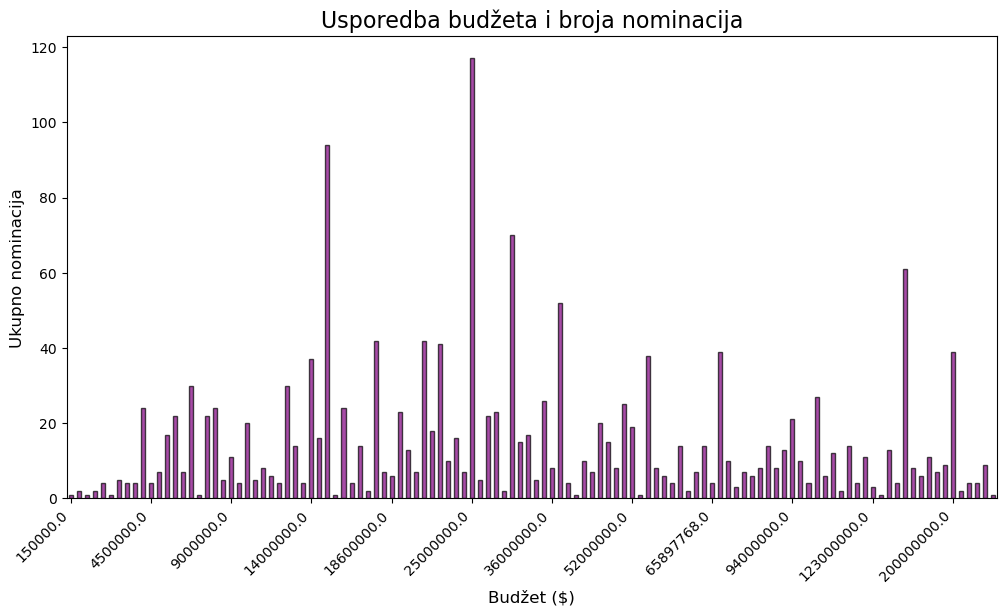

In [81]:
plt.figure(figsize=(12, 6))
merged_budget_by_nomination.plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)

plt.title('Usporedba budžeta i broja nominacija', fontsize=16)
plt.xlabel('Budžet ($)', fontsize=12)
plt.ylabel('Ukupno nominacija', fontsize=12)
plt.xticks(range(0, len(merged_budget_by_nomination), 10), rotation=45, ha='right', fontsize=10)

plt.show()

Na ovom dijagramu možemo primijetiti da veličina budžeta ne pokazuje jasnu povezanost s brojem nominacija. Filmovi s većim budžetima nemaju značajno više nominacija u usporedbi s onima s manjim budžetima. Možemo zaključiti da visina budžeta nije glavni faktor za uspjeh filma u broju nominacija.

Sada ćemo usporediti budžet s brojem nagrada.

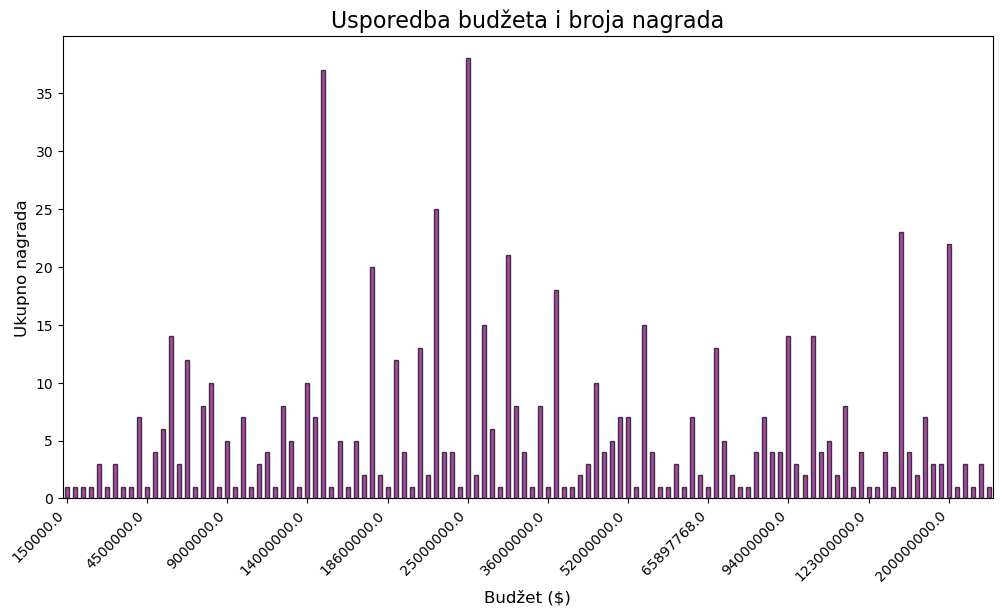

In [83]:
merged_budget_by_award = merged_data_cleaned.groupby("budget")["Award"].sum()

plt.figure(figsize=(12, 6))
merged_budget_by_award.plot(kind='bar', color='purple', edgecolor='black', alpha=0.7)
plt.title('Usporedba budžeta i broja nagrada', fontsize=16)
plt.xlabel('Budžet ($)', fontsize=12)
plt.ylabel('Ukupno nagrada', fontsize=12)
plt.xticks(range(0, len(merged_budget_by_award), 10), rotation=45, ha='right', fontsize=10)

plt.show()

Isto kao i na prethodnom dijagramu, možemo zaključiti da veličina budžeta ne utječe na broj nagrada.

<b>Žanrovi i broj nagrada i nominacija</b>

U ovom dijelu analizirat ćemo koji su žanrovi dobili najveći broj nominacija i nagrada. Promatrat ćemo samo one žanrove koji imaju minimalno 10 nominacija.

In [91]:
genre_award_nomination = merged_data.groupby("genre")[["Nomination", "Award"]].sum().sort_values(by="Nomination", ascending=False)
filtered_genre_award_nomination = genre_award_nomination[genre_award_nomination["Nomination"] > 10]
filtered_genre_award_nomination

,Nomination,Award
genre,,
Drama,554,214
Biography,428,165
Comedy,260,97
Action,244,104
Adventure,127,43
Crime,122,42
Animation,76,38


<b>Redatelji i uspjeh filmova</b>

U ovom djelu analizirat ćemo koji su redatelji najuspješniji temeljem broja osvojenih nagrada. Vizualizirat ćemo top 10 redatelja s najvećim brojem nagrada kako bismo dobili uvid u njihov doprinos filmskoj industriji.

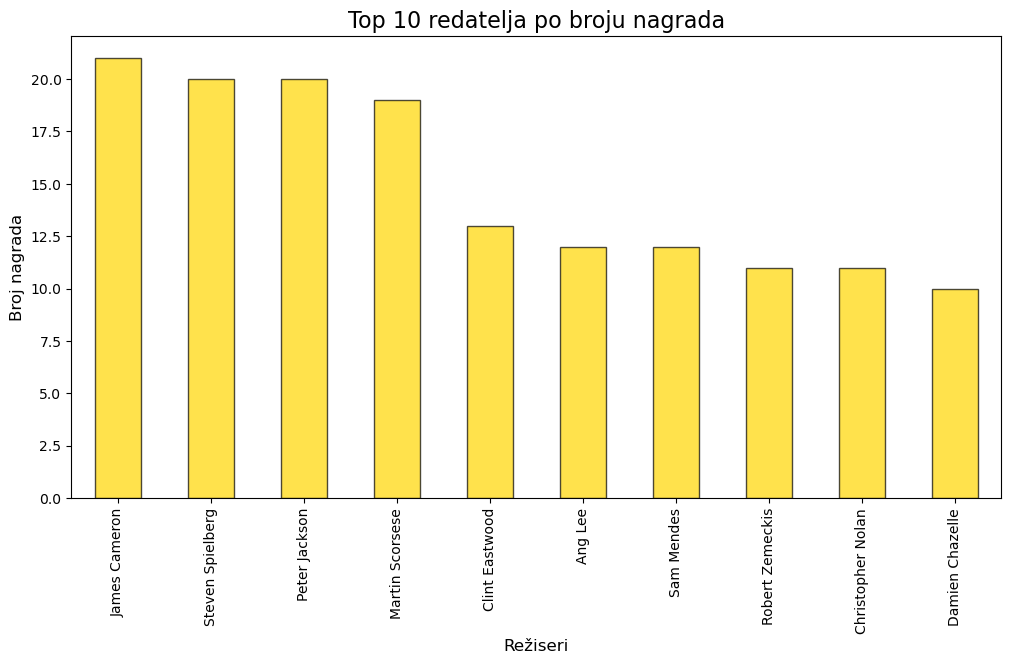

In [95]:
director = merged_data.groupby('director')['Award'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
director.plot(kind='bar', color='gold', edgecolor='black', alpha=0.7)
plt.title('Top 10 redatelja po broju nagrada', fontsize=16)
plt.xlabel('Režiseri', fontsize=12)
plt.ylabel('Broj nagrada', fontsize=12)
plt.show()

<b>Broj nominacija prema trajanju filma</b>

U ovom djelu analizirat ćemo povezanost između trajanja filma i broja nominacija koje je film dobio. Vizualizirat ćemo podatke kako bismo uočili postoji li povezanost između duljine trajanja filma i njegovog uspjeha na dodjelama nominacija.

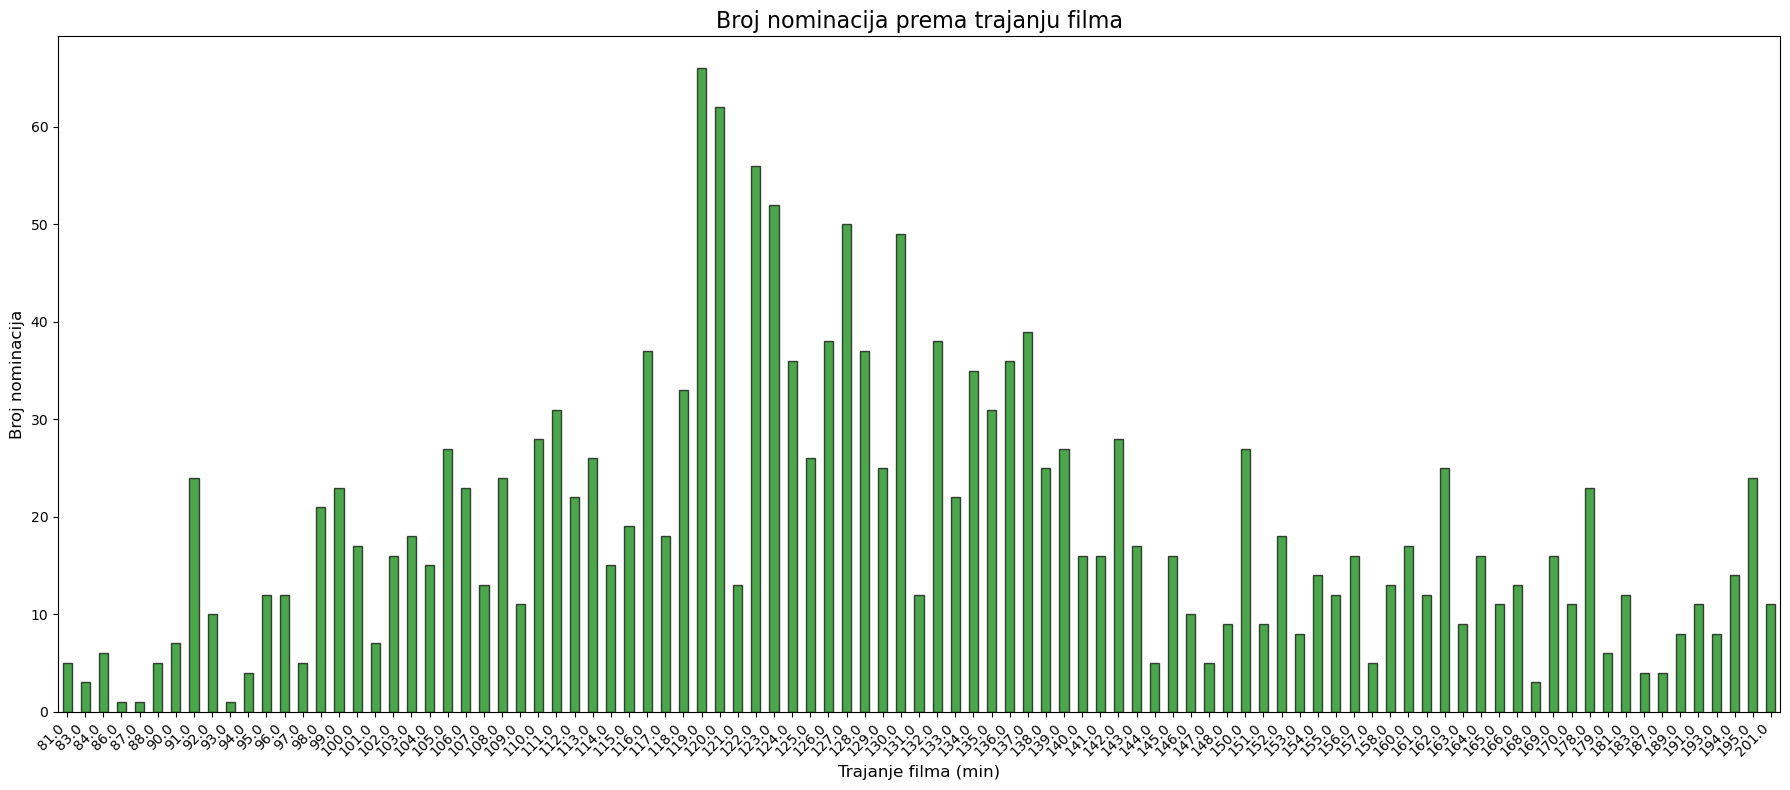

In [126]:
runtime_nominations = merged_data.groupby('runtime')['Nomination'].sum().sort_index()
plt.figure(figsize=(18, 8))
runtime_nominations.plot(kind='bar', color='green', edgecolor='black', alpha=0.7)
plt.title('Broj nominacija prema trajanju filma', fontsize=16)
plt.xlabel('Trajanje filma (min)', fontsize=12)
plt.ylabel('Broj nominacija', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

Iz dijagrama vidljivo je da filmovi s trajanjem od približno 110 do 140 minuta imaju najviše nominacija, pri čemu je vrhunac filmovi koji traju oko 120 minuta. Možemo zaključiti da su filmovi unutar tog raspona najoptimalniji za dobivanje nominacija dok kraći i duži filmovi dobivaju manji broj nominacija.

## Pohrana u bazu podataka

Sada ćemo pohraniti integrirani skup podataka u SQLite bazu podataka. Koristeći Pythonov modul sqlite3, najprije ćemo kreirati bazu podataka pod nazivom movies_oscar.db. Nakon toga, pomoću funkcije to_sql, spremit ćemo podatke iz DataFrame-a merged_data u tablicu merged_movies_oscar unutar baze. Na kraju, zatvaramo vezu s bazom kako bismo osigurali da su svi podaci sigurno pohranjeni.

In [99]:
merged_data = merged_data.rename(columns={'year': 'movie_year'})

In [101]:
import sqlite3

# Kreiranje SQLite baze
conn = sqlite3.connect('movies_oscar.db')

# Pohrana podataka u bazu podataka
merged_data.to_sql('merged_movies_oscar', conn, if_exists='replace', index=False)

# Zatvaranje veze
conn.close()

## Prikaz rada aplikacije

### Pristup podacima putem REST API-ja

U ovom djelu implementirat ćemo REST API koristeći Flask, koji omogućava dohvat podacima pohranjenima u SQLite bazi. API će sadržavati dohvaćanje svih filmova (/movies) te dohvat podataka o specifičnom filmu prema ID-u (/movies/<int:id>). Veza s bazom ostvaruje se preko funkcije get_db_connection. Ako traženi film ne postoji, API vraća odgovarajuću poruku o grešci s HTTP statusom 404. Flask aplikacija se pokreće na portu 5000, a podaci se obrađuju i formatiraju kako bi bili čitljivi.

In [103]:
from flask import Flask, jsonify, request

app = Flask(__name__)

def get_db_connection():
    conn = sqlite3.connect('movies_oscar.db')
    conn.row_factory = sqlite3.Row 
    return conn

# dohvaćanje svih filmova
@app.route('/movies', methods=['GET'])
def get_all_movies():
    conn = get_db_connection()
    cursor = conn.cursor()
    query = "SELECT * FROM merged_movies_oscar"
    cursor.execute(query)
    rows = cursor.fetchall()
    conn.close()
    
    movies = [dict(row) for row in rows]
    return jsonify(movies)

# dohvaćanje filma prema ID-u
@app.route('/movies/<int:id>', methods=['GET'])
def get_movie_by_id(id):
    conn = get_db_connection()
    movie = conn.execute("SELECT * FROM merged_movies_oscar WHERE rowid = ?", (id,)).fetchone()
    conn.close()
    
    if movie is None:
        return jsonify({"error": "Movie not found"}), 404
    
    return jsonify(dict(movie))

if __name__ == '__main__':
    app.run(port=5000, debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [23/Jan/2025 19:01:47] "GET /movies HTTP/1.1" 200 -
127.0.0.1 - - [23/Jan/2025 19:01:48] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:05:11] "GET /movies/5 HTTP/1.1" 200 -
127.0.0.1 - - [23/Jan/2025 19:05:11] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:11:20] "GET /movies HTTP/1.1" 200 -
127.0.0.1 - - [23/Jan/2025 19:11:20] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:13:56] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:13:57] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:14:00] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:14:20] "GET /movies HTTP/1.1" 200 -
127.0.0.1 - - [23/Jan/2025 19:21:38] "GET /1 HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:21:45] "GET /1 HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:21:51] "GET /1 HTTP/1.1" 404 -
127.0.0.1 - - [23/Jan/2025 19:22:10] "GET /movies/1 HTTP/1.1" 200 -
127.0.0.1 - - [23/Jan/

Kako bi dohvatili sve filmove potrebno je otvoriti generirani link sa ekstenzijom /movies: http://127.0.0.1:5000/movies

![](slika1.jpg)

Kako bi dohvatili filmove prema ID-u potrebno je otvoriti generirani link sa ekstenzijom /movies i ID-a kojeg želimo dohvatiti, npr. movies/1: http://127.0.0.1:5000/movies/1

![](slika2.jpg)

## Kritički osvrt

Projekt je uspješno obuhvatio sve ključne korake analize podataka, uključujući obradu, integraciju i vizualizaciju, kao i pohranu u SQLite bazu podataka te implementaciju REST API-ja za upravljanje podacima. Podaci su očišćeni i normalizirani, omogućujući detaljnu analizu trendova poput povezanosti budžeta i nagrada te uspješnosti različitih žanrova. REST API, izrađen pomoću Flask-a, pruža osnovnu funkcionalnost za dohvaćanje podataka, no mogao bi biti proširen dodatnim značajkama poput unosa, ažuriranja i brisanja podataka. Jedan od izazova bio je nedostatak podataka u ključnim stupcima poput budžeta i prihoda, gdje je više od 2000 redaka imalo prazne vrijednosti. Iako su takvi podaci filtrirani kako bi analize bile točne, nedostatak tih vrijednosti mogao je utjecati na preciznost rezultata, posebno kod korelacije budžeta, prihoda i uspjeha filmova. Dodavanje tih podataka koji nedostaju pomoću nekog drugog DataSeta moglo bi značajno promjeniti ovu analizu.

## Zaključak

U ovom projektu analizirali smo podatke o filmovima i njihovom uspjehu na dodjelama nagrada kako bismo otkrili povezanosti unutar filmske industrije. Detaljna analiza otkrila je zanimljive trendove, poput povezanosti budžeta i prihoda, kao i utjecaja žanra i ocjena na broj nominacija. Korištenjem Python alata poput Pandas, Matplotlib i Flask-a, implementirani su svi koraci analize podataka, od obrade i vizualizacije do pohrane u SQLite bazu podataka i izrade REST API-ja za pristup podacima. Rezultati ovog projekta pružaju korisne uvide u filmskoj industriji, posebno kada je riječ o strategijama budžeta. Unatoč određenim ograničenjima, poput nedostatka podataka u ključnim kategorijama poput budžeta i prihoda, analiza je ponudila solidnu osnovu za daljnje istraživanje.

## Literatura

[1] Matplotlib Documentation, [Online]. Dostupno: https://matplotlib.org/stable/users/index.html. [Preuzeto: 28. prosinca 2024.]

[2] Pandas Documentation, "Merging, joining, and concatenating," [Online]. Dostupno: https://pandas.pydata.org/docs/user_guide/merging.html. [Preuzeto: 2. siječnja 2025.]

[3] W. McKinney, Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython, 3nd ed. Sebastopol, CA, USA: O'Reilly Media, 2022. Dostupno: https://wesmckinney.com/book/ [Preuzeto: 30. prosinca 2024.]

[4] Data Carpentry, "Working with SQL databases in Python," [Online]. Dostupno: https://datacarpentry.github.io/python-ecology-lesson/instructor/09-working-with-sql.html. [Preuzeto: 16. siječnja 2025.]

[5] DigitalOcean, "How To Use an SQLite Database in a Flask Application," [Online]. Dostupno: https://www.digitalocean.com/community/tutorials/how-to-use-an-sqlite-database-in-a-flask-application. [Preuzeto: 16. siječnja 2025.]